# Genomic Data Analysis

In [1]:
import os
os.chdir("..")

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from helpers import load_config
import matplotlib.pyplot as plt
import seaborn as sns

configs = load_config(os.path.join("configs", "configs.yaml"))
study_path = configs["STORAGE_DIR_STUDY2"]

In [6]:
df = pd.read_csv(
    os.path.join(study_path, "cancer_samples_12_mutations_only.csv")
)
df.head(2)

,SAMPLE_ID,PFS_MONTHS,APC,TP53,KRAS,PIK3CA,SMAD4,DCC,POLE,POLD1,NTRK2,BRAF,NRAS,PTEN
0,TCGA-5M-AAT6-01,7.199921,1,0,1,0,0,1,1,1,0,0,0,0
1,TCGA-5M-AATE-01,26.629845,1,1,1,1,0,0,0,0,1,0,0,0


In [7]:
def categorize_pfs(months):
    """categorize pfs into 3 classes at thresholds 12, 36, 36+"""
    if months <= 12:
        return 0
    elif 12 < months <= 36:
        return 1
    elif 36 <= months <= 60:
        return 2
    else:
        return 3


df['y'] = df['PFS_MONTHS'].apply(categorize_pfs)
df.head(2)

,SAMPLE_ID,PFS_MONTHS,APC,TP53,KRAS,PIK3CA,SMAD4,DCC,POLE,POLD1,NTRK2,BRAF,NRAS,PTEN,y
0,TCGA-5M-AAT6-01,7.199921,1,0,1,0,0,1,1,1,0,0,0,0,0
1,TCGA-5M-AATE-01,26.629845,1,1,1,1,0,0,0,0,1,0,0,0,1


/var/folders/_0/qrjsyj4n0r951n63lt8qdzrc0000gn/T/ipykernel_98395/1369528549.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


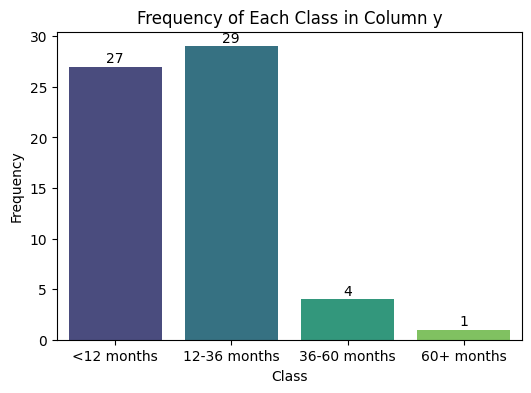

In [15]:
# Calculate the frequency of each class in column 'y'
class_counts = df['y'].value_counts().sort_index()

# Plot the frequency using a bar plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
# Add counts on top of the bars
for index, value in enumerate(class_counts.values):
    ax.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency of Each Class in Column y')
plt.xticks([0, 1, 2, 3], ['<12 months', '12-36 months', '36-60 months', '60+ months'])
plt.show()


In [12]:
df['y'].value_counts()

y
1    29
0    27
2     4
3     1
Name: count, dtype: int64

In [31]:
# df1 = df.drop(["SAMPLE_ID", "PFS_MONTHS"], axis=1)

# from imblearn.over_sampling import SMOTE

# X = df1.drop('y', axis=1)
# y = df1['y']

# # Apply SMOTE to balance the classes
# smote = SMOTE(random_state=42, k_neighbors=1)
# X_res, y_res = smote.fit_resample(X, y)

# # Combine the resampled features and target into a new dataframe
# df_resampled = pd.DataFrame(X_res, columns=X.columns)
# df_resampled['y'] = y_res

# # Display the class distribution after applying SMOTE
# print(df_resampled['y'].value_counts())

Cannot use SMOTE to generate synthetic records since it needs atleast 2 records in a class to produce synthetic records.    

Also there is no point in fitting a model to this, since its equivalent to three classes classification.